In [1]:
import yfinance as yf
import pandas as pd

msft = yf.Ticker("MSFT")
msft = msft.history(period="max")

/Users/j/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [2]:
msft.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054791,0.062849,0.054791,0.060163,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0


<Axes: xlabel='Date'>

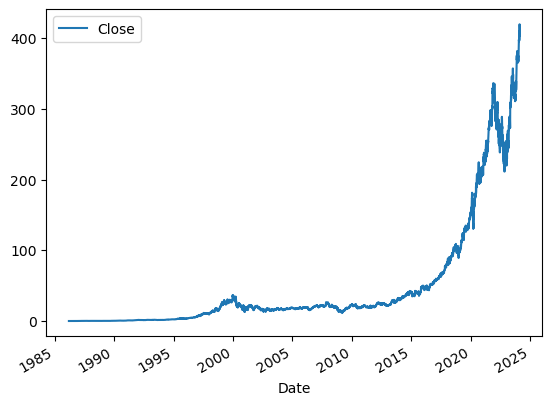

In [3]:
msft.plot.line(y="Close", use_index=True)

In [4]:
data = msft[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})
data["Target"] = msft.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

data["Target"].value_counts()

Target
1.0    4839
0.0    4720
Name: count, dtype: int64

In [5]:
data.head()

,Actual_Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060163,NaN
1986-03-14 00:00:00-05:00,0.062311,1.0
1986-03-17 00:00:00-05:00,0.063386,1.0
1986-03-18 00:00:00-05:00,0.061774,0.0
1986-03-19 00:00:00-05:00,0.060700,0.0


In [6]:
msft_prev = msft.copy()

In [7]:
msft_prev = msft_prev.shift(1)

In [8]:
msft_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054791,0.062849,0.054791,0.060163,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,6.776640e+07,0.0,0.0


In [9]:
predictors = ["Close", "High", "Low", "Open", "Volume"]
data = data.join(msft_prev[predictors])[1:]

In [10]:
data.head()

,Actual_Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062311,1.0,0.060163,0.062849,0.054791,0.054791,1.031789e+09
1986-03-17 00:00:00-05:00,0.063386,1.0,0.062311,0.063386,0.060163,0.060163,3.081600e+08
1986-03-18 00:00:00-05:00,0.061774,0.0,0.063386,0.063923,0.062311,0.062311,1.331712e+08
1986-03-19 00:00:00-05:00,0.060700,0.0,0.061774,0.063923,0.061237,0.063386,6.776640e+07
1986-03-20 00:00:00-05:00,0.059089,0.0,0.060700,0.062311,0.060163,0.061774,4.789440e+07


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [12]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [13]:
preds

Date
2023-09-26 00:00:00-04:00    0.0
2023-09-27 00:00:00-04:00    1.0
2023-09-28 00:00:00-04:00    0.0
2023-09-29 00:00:00-04:00    0.0
2023-10-02 00:00:00-04:00    1.0
                            ... 
2024-02-12 00:00:00-05:00    0.0
2024-02-13 00:00:00-05:00    0.0
2024-02-14 00:00:00-05:00    0.0
2024-02-15 00:00:00-05:00    0.0
2024-02-16 00:00:00-05:00    0.0
Length: 100, dtype: float64

In [14]:
precision_score(test["Target"], preds)

0.8333333333333334

In [15]:
combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
combined

,Target,Predictions
Date,,
2023-09-26 00:00:00-04:00,0.0,0.0
2023-09-27 00:00:00-04:00,1.0,1.0
2023-09-28 00:00:00-04:00,1.0,0.0
2023-09-29 00:00:00-04:00,1.0,0.0
2023-10-02 00:00:00-04:00,1.0,1.0
...,...,...
2024-02-12 00:00:00-05:00,0.0,0.0
2024-02-13 00:00:00-05:00,0.0,0.0
2024-02-14 00:00:00-05:00,1.0,0.0


<Axes: xlabel='Date'>

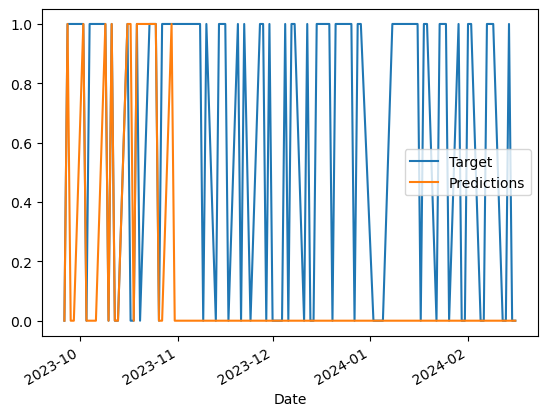

In [16]:
combined.plot()

In [57]:
def backtest(data, model, predictors, start=1000, step=50):
    predictions = []
    for i in range(start, data.shape[0], step):
    
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        model.fit(train[predictors], train["Target"])
        
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds <= .6] = 0
        
        combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)

In [58]:
predictions = backtest(data, model, predictors)

In [59]:
predictions["Predictions"].value_counts()

Predictions
0.0    7877
1.0     682
Name: count, dtype: int64

In [60]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5131964809384164

In [61]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [62]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", 
                                "annual_weekly_mean", "annual_quarterly_mean", "weekly_trend",
                                "open_close_ratio", "high_close_ratio", "low_close_ratio"]

In [64]:
predictions = backtest(data.iloc[365:], model, full_predictors)

In [65]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5692007797270955

In [66]:
predictions["Predictions"].value_counts()

Predictions
0.0    7681
1.0     513
Name: count, dtype: int64